# Opérations, contrôle, fonctions et modules

![](fig/python-logo.png)

- Opérateurs
- Structures de contrôle
- Fonctions
- Exceptions & gestionnaires de contexte
- Compréhensions de listes & expressions génératrices
- Modules
- Bonnes pratiques

***

*Contenu sous licence [CC BY-SA 4.0](https://creativecommons.org/licenses/by-sa/4.0)*

## Opérateurs

### Arithmétiques

```python
+, -, *, /, //, %, **
```

sont des opérateurs classiques qui se comportent de façon habituelle.

#### Particularités de la division

In [ ]:
# Avec des nombres entiers
print(16 / 3)  # Quotient de la division euclidienne (produit un réel)
print(16 // 3)  # Quotient de la division euclidienne (produit un entier)
print(16 % 3)  # Reste de la division euclidienne (produit un entier)

# Avec des nombres flottants
print(16.0 / 3)  # Division (produit un réel)
print(16.0 // 3)  # Quotient de la division (produit un réel)
print(16.0 % 3)  # Reste de la division ou modulo (produit un réel)

#### Puissance

In [ ]:
print(2**10)
# On peut aussi utiliser la fonction pow() du module math, mais celle-ci renvoie un réel.
import math

print(math.pow(2, 10))

### Logiques
 
```python
and, or, not
```

retournent une valeur booléenne.


In [ ]:
print(True or False)
print(True and False)
print(not True)
print(not False)
print(not [])
print(not (1, 2, 3))

Attention, ce sont des opérateurs *court-circuit :*

In [ ]:
a = True
b = False and a  # b vaut False sans que a soit évalué
c = True or a  # c vaut True, sans que a soit évalué

Pour s'en convaincre :

In [ ]:
True or print("nicht a kurz schluss")
False and print("not a short circuit")
print('on a prouvé que ce sont des opérateurs "court-circuit"...')

> **Exercice :** Modifiez les valeurs `True` et `False` dans la cellule précédente, pour visualiser le fonctionnement de ces opérateurs.

### Comparaison

``python
==, is, !=, is not, >, >=, <, <=
``
L'évaluation de ces opérateurs retourne une valeur booléenne.

In [ ]:
print(2 == 2)
print(2 != 2)
print(2 == 2.0)
print(type(2) is int)

On peut utiliser ces opérateurs avec des variables et des appels à des fonctions.

In [ ]:
x = 3
print(1 > x)
y = [0, 1, 42, 0]
print(x <= max(y))
print(x <= min(y))

On peut chaîner ces opérateurs, mais ils fonctionnent en mode *court-circuit* et l'opérande centrale n'est évaluée qu'une seule fois.

In [ ]:
x = 3
print(2 < x <= 9)  # équivalent à 2 < x and x <= 9

**Attention :** comparer des types **non numériques** peut avoir des résultats surprenants.

In [ ]:
# Chaînes de caractères
print("aaa" < "abc")
print("aaa" < "aaaa")
print("22" > "3")

In [ ]:
# Listes
print([1, 2, 3, 4] > [42, 42])
print([666] > [42, 42])

**Attention :** comparer des types **incompatibles** peut avoir des résultats surprenants.

In [ ]:
# Cette cellule génère des erreurs
print("chaîne:\t", "a" < 2)
print("liste:\t", ["zogzog"] > 42)
print("vide:\t", [] > 1)
print("tuple:\t", [23, 24] >= (23, 24))
print("dict:\t", [23, 24] >= {23: True, 24: "c'est pas faux"})

Attention, l'égalité de valeur n'implique pas forcément que l'identité des objets comparés est la même.

In [ ]:
a = []  # a est une liste vide
b = []  # b est une AUTRE liste vide

In [ ]:
print(a == b)  # test de valeur
print(a is b)  # test d'identité
print(f"{id(a) = }")
print(f"{id(b) = }")

Mais, comme vu précédemment, des variables différentes peuvent référencer le même objet.

In [ ]:
c = a
print(a == c)  # test de valeur
print(a is c)  # test d'identité

### bits à bits *(bitwise)*

``python
|, ^, &, <<, >>, ~
``
- Ces opérateurs permettent de manipuler individuellement les bits d'un entier.
- Ce sont des opérations bas-niveau, souvent utilisées pour piloter directement du matériel, pour implémenter des protocoles de communication binaires (par exemple réseau ou disque).
- L'utilisation d'entiers comme ensemble de bits permet des encodages de données très compacts, un booléen (True, False) ne prendrait qu'un bit en mémoire, c'est a dire que l'on peut encoder 64 booléens dans un entier.

Description complète [ici](https://wiki.python.org/moin/BitwiseOperators).

In [ ]:
val = 67  # == 64 + 2 + 1 == 2**6 + 2**1 + 2**0 == 0b1000011
print(bin(val))

mask = 1 << 0  # On veut récupérer le 1er bit
print("le 1er  bit vaut", (val & mask) >> 0)

mask = 1 << 1  # On veut récupérer le 2ème bit
print("le 2ème bit vaut", (val & mask) >> 1)

mask = 1 << 2  # On veut récupérer le 3ème bit
print("le 3ème bit vaut", (val & mask) >> 2)

mask = 1 << 6  # On veut récupérer le 7ème bit
print("le 7ème bit vaut", (val & mask) >> 6)

# Si on positionne le 4ème bit a 1 (on rajoute 2**3 = 8)
newval = val | (1 << 3)
print(newval)

# Si on positionne le 6ème bit a 0 (on soustrait 2**7 = 64)
print(newval & ~(1 << 6))

> **Exercice :** Retournez une chaîne de caractères représentant le nombre contenu dans `x` écrit en notation binaire.
> Par exemple :

$$
5 \rightarrow 101 \\  
6 \rightarrow 110 \\
7 \rightarrow 111  
$$

In [ ]:
x = 7
# votre code ici

In [ ]:
# Décommentez puis exécutez pour afficher le corrigé :
# %load exos/snippets/03_langage/bits_a_bits.py

### Affectation augmentée


``python
+=, -=, *=, /=, **=  # etc.
``

In [ ]:
a = 4
a += 1  # <=> a = a + 1
print(a)
a //= 2
print(a)
a **= 3
print(a)
a %= 2
print(a)

### Compatibilité de type, coercition de type

Python effectue certaines conversions implicites quand on ne perd pas d'information (par exemple d'entier vers flottant).

In [ ]:
print(1 + 0b1)
print(1 + 1.0)
print(1.0 + 2 + 0b11 + 4j)

Mais dans d'autres cas, la conversion doit être explicite.

In [ ]:
# Cette cellule génère une erreur
a = 1
b = "1"
a + b

**Exercice** :

Sans toucher au `+`, corrigez la ligne `4` de la cellule ci-dessus afin d'afficher :

1. la chaîne `'11'`
2. l'entier `2`
3. l'entier `11`

In [ ]:
a = 1
b = "1"
a + b

In [ ]:
# Décommentez puis exécutez pour afficher le corrigé :
# %load exos/snippets/03_langage/compatibilite.py

### Priorité des opérateurs

Les opérateurs ont des priorités classiques en python.

Par exemple, dans l'ordre :

1. puissance : `**`
2. multiplication, division : `*` et `/`
3. addition, soustraction : `+` et `-`

etc.

Utilisez des parenthèses quand elles aident à la lisibilité et à la clarté.

Pour plus d'informations, voir [ici](https://docs.python.org/3/reference/expressions.html).

## Structures de contrôle

- La mise en page comme syntaxe
- `pass`
- tests conditionels : `if/elif/else`
- boucles
	* `for <element> in <iterable>`
	* `while`
	* `break`
	* `continue`

### La mise en page comme syntaxe

- La mise en page est importante en python, c'est une différence majeure avec les autres langages (Java, C/C++, etc.)
- Python utilise l'indentation du code avec des caractères blancs plutôt que des mots clés (`begin`/`end` en pascal) ou des symboles (`{}` en java et C/C++). Cela permet de rendre le code plus compact.
- Elle va servir à délimiter des blocs de code sur lesquels les structures de contrôle comme les boucles ou les tests de conditions vont s'appliquer.
- De toute façon, dans les autres langages, on indente aussi le code pour l'aspect visuel et la lisibilité.
- L'indentation faisant partie de la syntaxe du langage, il faut être rigoureux et suivre la règle suivante :
    - 4 espaces pour passer au niveau suivant
    - éviter les tabulations et préférer les espaces et surtout ne pas les mélanger !

In [ ]:
if True:
    print("toutes")
    print("les")
    print("lignes")
    print("au même niveau d'indentation forment un bloc de code")
print('et quand on remonte, on "termine" un bloc de code')

> **Exercice** : changez le True en False, et observez quelles lignes de code ne sont plus exécutées.

### `pass`

En cas de besoin d'un bloc de code qui ne fait rien, on utilise le mot clé `pass` (équivalent à NOP ou NO-OP)

#### Exemple : une boucle infinie

```python
while True:
    pass
```
> (à ne pas exécuter dans une cellule sous peine de bloquer le noyau de ce notebook)

### Tests conditionnels

Les instructions `if/elif/else` permettent d'exécuter des blocs d'instructions en fonction de conditions : 

```python
if test1:
    <bloc d instructions 1>
elif test2:
    <bloc d instructions 2>
else:
    <bloc d instructions 3>
```
`elif` est la contraction de "`else if`".

In [ ]:
if True:
    print("c'est vrai!")

In [ ]:
if False:
    print("je suis caché!")
else:
    print("mais moi je suis en pleine lumière...")

In [ ]:
# Pour cet exemple, on itère sur les éléments d'un tuple (cf. boucle for plus loin)
for position in 2, 9, 3, 1, 8:
    if position == 1:
        print(position, "Or")
    elif position == 2:
        print(position, "Argent")
    elif position == 3:
        print(position, "Bronze")
    else:
        print(position, "Vestiaires")

In [ ]:
taille = 1.50
if taille >= 1.70:  # La taille moyenne en France
    print("grand")
else:
    print("petit")

> **Exercices** :
>
> 1. Editez la cellule pour y mettre votre taille et exécutez-la pour savoir si vous êtes grand ou petit.
> 2. Gérez le cas des gens de taille moyenne.

In [ ]:
# Décommentez puis exécutez pour afficher le corrigé :
#%load exos/snippets/03_langage/condition.py

## Boucles

Les boucles sont les structures de contrôle permettant de répéter l'exécution d'un bloc de code plusieurs fois.

### Boucle `while`

La plus simple est la boucle de type `while` :

```python
while <condition>:
    <bloc 1>
<bloc 2>
```
Tant que `<condition>` est True, le `<bloc 1>` est exécuté, quand la condition passe à False, l'exécution continue au `<bloc 2>`.

In [ ]:
compteur = 3
while compteur > 0:
    print("le compteur vaut :", compteur)
    compteur -= 1
print("le compteur a été décrémenté 3 fois et vaut maintenant", compteur)

> **Exercice** :  
> C'est la soirée du réveillon. Ecrivez une boucle `while` qui décompte les secondes à partir de `5` pour souhaiter la bonne année.  
> Allez voir [par ici](https://docs.python.org/3/library/time.html#time.sleep) pour passer le temps...

In [ ]:
import time
# Votre code ici

In [ ]:
# Décommentez puis exécutez pour afficher le corrigé :
# %load exos/snippets/03_langage/while.py

### Boucle `for`

Une boucle plus complexe : `for/in`

```python
for <variable> in <iterable>:
    <bloc 1>
<bloc 2>
```

A chaque tour de boucle, la variable `<variable>` va référencer un des éléménts de l'`<iterable>`. La boucle s'arrête quand tous les éléménts de l'itérable ont été traités. Il est fortement déconseillé de modifier l'itérable en question dans le `<bloc 1>`.

In [ ]:
invites = ("Aline", "Bernard", "Céline", "Dédé") 
for invite in invites:
    print(f"Bonjour {invite}, bienvenue à la soirée de gala !")
print("Maintenant, tout le monde a été bien accueilli.")

> **Exercice** : Rajoutez des invités à la fête. Vérifiez que tout le monde est accueilli correctement.

In [ ]:
# Maintenant, si nous avons reçu des réponses à notre invitation, utilisons un dictionnaire :
invites = {"Aline": True, "Bernard": False, "Céline": True, "Dédé": True}
for personne, presence in invites.items():
    if presence:
        print(f"Bonjour {personne}, bienvenue à la soirée de gala !")
    else:
        print(f"Malheureusement, {personne} ne sera pas avec nous ce soir.")
print("Maintenant, tout le monde a été bien accueilli ou excusé.")

La méthode `.items()` renvoie une vue itérable des éléments du dictionnaire.

> **Exercice** : Rajoutez des invités à la fête. Certains ayant répondu qu'ils ne pourraient pas venir. Vérifiez que tout le monde est accueilli ou excusé correctement.

Si on souhaite itérer sur une liste et que l'on a besoin de l'indice de ses éléments, on utilise une combinaison de [`range()`](https://docs.python.org/3/library/functions.html#func-range) et [`len()`](https://docs.python.org/3/library/functions.html#len).

In [ ]:
nombres = [2, 4, 8, 6, 8, 1, 0, 1j]
for i in range(len(nombres)):
    nombres[i] **= 2

print("valeurs de i:", list(range(len(nombres))))
print("carrés      :", nombres)

Il existe une forme raccourcie pour faire ce genre de choses, la fonction interne [`enumerate()`](https://docs.python.org/3/library/functions.html#enumerate)

In [ ]:
nombres = [2, 4, 8, 6, 8, 1, 0]
impairs = nombres[:]  # On copie la liste nombres
for i, nombre in enumerate(nombres):
    impairs[i] = bool(nombre % 2)
# Les impairs
print(impairs)

#### Note

La fonction interne [`range()`](https://docs.python.org/3/library/functions.html#func-range) retourne un itérateur. C'est un objet qui se comporte comme une liste sans pour autant allouer la mémoire nécessaire au stockage de tous ses éléments. Le coût de création d'une vraie liste augmente avec sa taille (son empreinte mémoire aussi !).

- une liste (ou un tuple) contient des données
- un itérateur possède la méthode qui permet de calculer l'élément suivant dans une boucle `for`.

#### Note de la note

En Python version 2.x, Il existait deux versions de cette fonctionnalité: `range()` et `xrange()`. La première retournait une vraie liste, allouée complètement, alors que `xrange()` retournait un itérateur.

In [ ]:
print(type(range(3)))  # comme xrange() en python2
print(repr(range(3)))  # comme xrange() en python2
print(type(list(range(3))))  # comme range en python2
print(repr(list(range(3))))  # comme range en python2

### Instruction `break`

Il est possible d'arrêter prématurément une boucle grâce a l'instruction `break`.

L'instruction `break` est utilisable indifférement dans les boucles `for` ou `while`. 

In [ ]:
compteur = 3
while True:  # Notre boucle infinie
    compteur -= 1
    print(f"Dans la boucle infinie! {compteur = }")
    if compteur <= 0:
        break  # On sort de la boucle while immédiatement
    print(f"On continue, {compteur = }")
print("C'était pas vraiment une boucle infinie...")

En cas d'imbrication de plusieurs boucles, l'instruction `break` sort de la plus imbriquée (la plus proche).

In [ ]:
for i in (1, 2, 3):
    for j in (1, 2, 3, 4):
        if i == 2:
            break
        print(f"{i, j = }")

### Instruction `continue`

Si, dans une boucle, on veut passer immédiatement à l'itération suivante, on utilise l'instruction `continue`.

In [ ]:
compteur = 9
while compteur > 0:
    compteur -= 1
    if compteur % 2:
        compteur /= 2
        print("impair, on divise :", compteur)
        continue  # retourne immédiatement au début de la boucle
    print("pair, RAS")
print("c'est fini...")

## Fonctions

Les fonctions permettent de réutiliser des blocs de code à plusieurs endroits différents sans avoir à copier ce bloc.

En python, il n'y a pas de notion de sous-routine. Les procédures sont gérées par les objets de type fonctions, avec ou sans valeur de retour.

```python
def <nom fonction>(arg1, arg2, ...):
    <bloc d instructions>
    return <valeur>  # Instruction optionnelle
```
On distingue :

- les fonctions avec `return` des fonctions sans `return`
- les fonctions sans arguments (pour lesquelles `()` est vide) des fonctions avec arguments `(arg1, arg2, ...)`

`<nom fonction>(arg1, arg2, ...)` est appelé **signature** de la fonction.

### Fonctions sans arguments

#### Fonctions sans `return`

Pour définir une fonction :

In [ ]:
def func():  # Definition de la fonction
    print("You know what?")
    print("I'm happy!")


Pour utiliser une fonction que l'on a défini :

In [ ]:
func()  # 1er Appel de la fonction
func()  # 2eme appel
func()  # 3eme appel, etc...
print(func())  # On l'appelle et on affiche sa valeur de retour

> **Exercice** : Ecrivez une fonction nommée `rien` qui ne fait rien et appelez là deux fois.

In [ ]:
# Votre code ici

In [ ]:
# Décommentez puis exécutez pour afficher le corrigé:
# %load exos/snippets/03_langage/rien.py

#### Fonctions avec `return`

In [ ]:
def func():  # Definition de la fonction
    return "I'm happy"  # La fonction retourne une chaine de caractère


print("1er appel:")
func()  # 1er Appel de la fonction : la valeur retournée n'est pas utilisée
print("2eme appel:")
ret_val = func()  # Le retour du 2eme appel est stocké
print("La fonction func() nous a renvoyé la valeur:", ret_val)

> **Exercice** : Ecrivez une fonction nommée `eloge_de_rien` qui retourne la chaine de caractères `rien`. Appelez-là et affichez sa valeur de retour.

In [ ]:
# Votre code ici

In [ ]:
# Décommentez puis exécutez pour afficher le corrigé:
# %load exos/snippets/03_langage/eloge_de_rien.py

**Important :** l'instruction `return` provoque une sortie de la fonction.
Dans le code suivant, la ligne qui appelle la fonction `print()` n'est pas exécutée.

In [ ]:
def func():
    return "je sors"
    print("après return")


func()

### Fonctions avec arguments

Pour définir une fonction qui prend des arguments, on nomme ces arguments entre les parenthèses de la ligne `def`. Ces paramètres seront définis comme des variables à l'intérieur de la fonction et recevrons les valeurs passées lors des appels de celle-ci.

In [ ]:
def somme(x, y):
    return x + y

Pour utiliser cette fonction avec diverses valeurs, il suffit de l'appeler plusieurs fois :

In [ ]:
print(somme(1, 2))
print(somme(4, 7))
print(somme(2 + 2, 7)) 
print(somme(somme(2, 2), 7))

> **Exercice** :
- Définissez une fonction nommée `chevalier` qui prend un paramètre `n` et qui affiche `n` fois (avec `print()`) la chaîne de caractères `Nee!`
- appelez cette fonction pour vérifier que `chevalier(3)` dit bien `Nee!` trois fois comme il convient !

Voici quelques exemples montrant comment cette fonction doit se comporter:

```python
chevalier(1)
Nee!
chevalier(3)
Nee!Nee!Nee!
chevalier(6)
Nee!Nee!Nee!Nee!Nee!Nee!
```

In [ ]:
def chevalier(n):
    # Votre code ici
    pass

In [ ]:
# Vérifions que tout fonctionne bien:
chevalier(1)
chevalier(3)
chevalier(6)

In [ ]:
# Décommentez puis exécutez pour afficher le corrigé:
# %load exos/snippets/03_langage/chevalier.py

> **Exercice** : Ecrivez une autre fonction, nommée `chevalier_ret` :
>- qui prend 2 paramètres : un entier `n` et un booléen
>- qui retourne une chaine de caractères de la chaîne `nee!` ou `NEE!` en fonction du paramètre booléen, chaîne répétée `n` fois.
>
> Appelez cette fonction et affichez sa valeur de retour.
>
>Voici quelques exemples montrant comment cette fonction doit se comporter:
>
>```python
>a = chevalier_ret(1, True)
>print(a)
>NEE!
>print(chevalier_ret(3, False))
>nee!nee!nee!
>print(chevalier_ret(6, True))
>NEE!NEE!NEE!NEE!NEE!NEE!
>```

In [ ]:
# Votre code ici
def chevalier_ret(n: int, cri: bool):
    return n * ("NEE!" if cri else "nee!")

In [ ]:
# Vérifions que tout fonctionne bien:
a = chevalier_ret(1, True)
print(a)
a = chevalier_ret(3, False)
print(a)
a = chevalier_ret(6, True)
print(a)

In [ ]:
# Décommentez puis exécutez pour afficher le corrigé:
# %load exos/snippets/03_langage/chevalier_ret.py

#### Utilisation de valeurs par défaut

In [ ]:
def somme(x, y=1):
    return x + y


print(somme(1, 2))

 Si sa valeur n'est pas spécifiée lors de l'appel, le paramètre `y` prend la valeur par défaut (ici : `1`)

In [ ]:
print(somme(4))

**Note :** Les arguments ayant une valeur par défaut doivent être placés **en dernier**.

#### Utilisation des arguments par leur nom

Si les arguments sont explicitiment nommés lors de l'appel, leur ordre peut être changé :

In [ ]:
def diff(x, y):
    return x - y


print(diff(4, 7))
print(diff(y=7, x=4))

#### Capture d'arguments non définis

##### Arguments positionnels dans un tuple

On définit une fonction dont l'argument est `*args` :

In [ ]:
def fonc(*args):
    # args est un tuple :
    print(type(args))
    # ses éléments sont les arguments passés lors de l'appel :
    print(args)

On l'appelle avec n'importe quelle séquence d'arguments :

In [ ]:
fonc("n'importe", "quel nombre et type de", "paramètres", 5, [1, "toto"], None)

##### Arguments nommés dans un dictionnaire

On définit une fonction dont l'argument est `**kwargs` :

In [ ]:
def fonc(**kwargs):
    # kwargs est un dictionnaire :
    print(type(kwargs))
    # ses éléments sont les arguments nommés passés lors de l'appel
    print(kwargs)

On l'appelle en nommant les arguments : 

In [ ]:
fonc(x=1, y=2, couleur="rouge", epaisseur=2)

On peut combiner ce type d'arguments pour une même fonction :

In [ ]:
def fonc(n, *args, **kwargs):  # cet ordre est important
    print(f"{n = }")
    print(f"{args = }")
    print(f"{kwargs = }")


print("appel 1")
fonc(3)
print("appel 2")
fonc(3, "bacon")
print("appel 3")
fonc(2, "spam", "egg", x=1, y=2, couleur="rouge", epaisseur=2)

**Remarques** : 

- les noms `args` et `kwargs` ne sont que des conventions (à respecter, toutefois !), seul le caractère `*` est déterminant
- l'ordre `(arg1, arg2, ..., *args, **kwargs)` doit être strictement respecté

#### *Packing/unpacking*

- La syntaxe `*args` dans la définition de la fonction correspond à une opération de *packing* : Python transforme une séquence de variables en tuple.

- L'inverse existe : ça s'appelle l'*unpacking*.

- Le *packing/unpacking* se pratique déjà par la manipulation des tuples :

In [ ]:
trio = "sax", "drums", "bass"  # packing
print(f"{trio = }")
you, her, him = trio  # unpacking
print(f"{you = }")
print(f"{her = }")
print(f"{him = }")

Il peut également se pratiquer dans le passage d'arguments de fonction

In [ ]:
def fonc(*args):
    print(args)


fonc(you, her, him)  # ici on liste directement les arguments
fonc(*trio)  # là on "unpack" un tuple

Et de la même façon pour un dictionnaire :

In [ ]:
def fonc(**kwargs):
    print(kwargs)


trio_dict = {"sax": "you", "drums": "her", "bass": "him"}
fonc(
    sax="you", drums="her", bass="him"
)  # ici on liste directement les arguments nommés
fonc(**trio_dict)  # là on "unpack" un dictionnaire

### Espace de nommage et portée des variables

#### 1er exemple

On veut illustrer le mécanisme de l'espace de nommage des variables :


In [ ]:
def func1():
    a = 1
    print(f"Dans func1(), {a = }")


def func2():
    print(f"Dans func2(), {a = }")


a = 2
func1()
func2()
print(f"Dans l'espace englobant, {a = }")

Cet exemple montre deux comportements :

1. Une variable définie localement à l'intérieur d'une fonction cache une variable du même nom définie dans l'espace englobant (cas de `func1()`).
2. Quand une variable n'est pas définie localement à l'intérieur d'une fonction, Python va chercher sa valeur dans l'espace englobant (cas de `func2()`).

#### 2ème exemple

On veut illustrer le mécanisme de portée des variables au sein des fonctions :

In [ ]:
def func():
    a = 1
    bbb = 2
    print(f"Dans  func() : {a = }")


a = 2
print(f"Avant func() : {a = }")
func()
print(f"Après func() : {a = }")


Les variables définies localement à l'intérieur d'une fonction sont détruites à la sortie de cette fonction. Ici, la variable `bbb` n'existe pas hors de la fonction `func()`, donc Python renvoie une erreur si on essaye d'utiliser `bbb` depuis l'espace englobant :

In [ ]:
# Cette cellule génère une erreur
print(bbb)

### Fonctions *built-in*

Ces fonctions sont disponibles dans tous les contextes. La liste complète est détaillée [ici](https://docs.python.org/3/library/functions.html#). En voici une sélection :

- `dir(obj)` : retourne une liste de toutes les méthodes et attributs de l'objet `obj`
- `dir()` : retourne une liste de tous les objets du contexte courant
- `eval(expr)` : analyse et exécute la chaîne de caractère `expr`

In [ ]:
a = 1
b = eval("a + 1")
print(f"{type(b) = } ; {b = }")

- `globals()` : retourne un dictionnaire des variables présentes dans le contexte global
- `locals()` : idem `globals()` mais avec le contexte local
- `help(obj)` : affiche l’aide au sujet d’un objet
- `help()` : affiche l’aide générale (s'appelle depuis l'interpréteur interactif)

- `input(prompt)` : retourne une chaîne de caractère lue dans la console après le message `prompt`

In [ ]:
reponse = input("Ca va ? ")

if reponse.lower() in ("o", "oui", "yes", "y", "ok", "da", "jawohl", "ja"):
    print("Supercalifragilisticexpialidocious")
else:
    print("Faut prendre des vacances...")

- `len(seq)` : retourne la longueur de la séquence `seq`
- `max(seq)` : retourne le maximum de la séquence `seq` 
- `min(seq)` : retourne le minimum de la séquence `seq`

- `range([start=0], stop[, step=1])` : retourne un itérateur d'entiers allant de `start` à `stop - 1`, par pas de `step`.

In [ ]:
print(list(range(10)))
print(list(range(5, 10, 2)))

- `repr(obj)`: affiche la représentation de l'objet `obj`.
- `reversed(seq)` : retourne l’inverse de la séquence `seq`
- `sorted(seq)` : retourne une séquence triée à partir de la séquence `seq`
- `sum(seq)` : retourne la somme des éléments de la séquence `seq`

### Exercices sur les fonctions

#### Exercice 1

Ecrire une fonction `stat()` qui prend en argument une liste d'entiers et retourne un tuple contenant :
- la somme
- le minimum
- le maximum


des éléments de la liste

In [ ]:
def stat(a_list: list[int]) -> tuple[int]:
    # votre fonction
    pass

In [ ]:
# Décommentez puis exécutez pour afficher le corrigé:
# %load exos/snippets/03_langage/stat.py

<a id='wrapper'></a>
#### Exercice 2 : écriture d'un *wrapper* de fonction

Noël arrive vite... Amusez-vous avec les boules de décoration !

![sapin](fig/sapin.jpg)

Soit une fonction `boule()` capable d'accrocher une boule de couleur à la position `(x, y)` d'un sapin.


> <span style="font-size:0.7em;">Exercice inspiré du Mooc de l'INRIA [Python : des fondamentaux à l'utilisation du langage](https://www.fun-mooc.fr/courses/course-v1:UCA+107001+session02/about)</span>


In [ ]:
def boule(x, y, couleur="bleue"):
    print(f"J'accroche une boule en ({x}, {y}) de couleur {couleur}")


# On place la première boule sur le sapin
boule(1, 2)
# Puis une autre, etc.
boule(3, 4, couleur="rouge")

Ecrire une fonction *wrapper* `boule_or()` qui crée des boules dorées en appelant la fonction `boule()`. Dans le futur, on souhaite modifier la fonction `boule()` pour lui faire accepter un nouvel argument `rendu (brillant, mat, etc.)`.
La fonction `boule_or()` devra continuer à fonctionner après cette modification de la fonction `boule()` et intégrer la nouvelle fonctionnalité `rendu` sans qu'il soit nécessaire de modifier `boule_or()`.

In [ ]:
# Cellule à modifier
def boule_or(*args, **kwargs):
    # Votre code ici
    pass


# On place une boule en or sur le sapin
boule_or(1, 2)

Maintenant, on met à jour la fonction `boule()` :

In [ ]:
def boule(x, y, couleur="bleue", rendu="mat"):
    print(
        f"J'accroche une boule en ({x}, {y}) de couleur {couleur} et de rendu {rendu}."
    )


boule(1, 3, couleur="jaune", rendu="brillant")

Vérifier que votre fonction `boule_or()` marche encore et gère la nouvelle fonctionnalité :

In [ ]:
boule_or(3, 1, rendu="brillant")  # doit retourner :
# J'accroche une boule en (3, 1) de couleur or et de rendu brillant.

In [ ]:
# Décommentez puis exécutez pour afficher le corrigé:
# %load exos/snippets/03_langage/boule.py

## Exceptions

Pour signaler des conditions particulières (erreurs, évenements exceptionnels), Python utilise un mécanisme de levée d'exceptions.

In [ ]:
# Cette cellule génère une erreur
raise Exception

Ces exceptions peuvent embarquer des données permettant d'identifier l'évenement producteur.

In [ ]:
# Cette cellule génère une erreur
raise Exception("Y a une erreur")

La levée d'une exception interrompt le cours normal de l'exécution du code et "remonte" jusqu'à l'endroit le plus proche gérant cette exception.

Pour intercepter les exceptions, on écrit :

```python
try:
    <bloc de code 1>
except Exception:
    <bloc de code 2>
```

In [ ]:
try:
    print("ici ca fonctionne")
    # ici on détecte une condition exceptionnelle, on signale une exception
    raise Exception("y a un bug")
    print("on n'arrive jamais ici")
except Exception as e:
    # L'exécution continue ici
    print(
        f"ici on peut essayer de corriger le problème lié à l'exception : Exception({e})"
    )
print("et après, ça continue ici")

Exemple illustrant le mécanisme de remontée des exceptions d'un bloc à l'autre :

In [ ]:
def a():
    raise Exception("coucou de a()")


def b():
    print("b() commence")
    a()
    print("b() finit")


try:
    b()
except Exception as e:
    print("l'exception vous envoie le message :", e)


### Exercice

Ecrivez une fonction `openfile()` :

- qui demande à l'utilisateur un nom de fichier à ouvrir
- qui gère correctement les fichiers inexistants.
- qui affiche la première ligne du fichier ouvert
- qui retourne une valeur booléenne indiquant que le fichier a été ouvert ou non.

In [ ]:
# Votre code ici
def openfile(filename: str):
    try:
        f = open(filename, 'r')
        print(f.readline())
        f.close()
        return True
    except FileNotFoundError:
        return False

print(openfile("exos/interessant.txt"))

In [ ]:
# Décommentez puis exécutez pour afficher le corrigé:
# %load exos/snippets/03_langage/openfile.py

Pour plus d'informations sur les exceptions, lire ce [tutoriel](https://docs.python.org/3/tutorial/errors.html).

## Les gestionnaires de contexte

Pour faciliter la gestion des obligations liées à la libération de ressources, la fermeture de fichiers, etc... Python propose des gestionnaires de contexte introduits par le mot-clé `with`.

In [ ]:
with open("exos/interessant.txt", "r") as fichier_ouvert:
    # Dans ce bloc de code le fichier est ouvert en lecture, on peut l'utiliser normalement
    print(fichier_ouvert.read())
# Ici, on est sorti du bloc et du contexte : le fichier à été fermé automatiquement

In [ ]:
# Cette cellule génère une erreur
print(fichier_ouvert.read())

> **Exercice** : Reprenez le code de l'exercice précédent, et utilisez `with` pour ne pas avoir à utiliser la méthode `close()`.

In [ ]:
# Votre code ici

In [ ]:
# Décommentez puis exécutez pour afficher le corrigé:
# %load exos/snippets/03_langage/openfile2.py

Il est possible de créer de nouveaux gestionnaires de contexte, pour que vos objets puissent être utilisés avec `with` et que les ressources associées soient correctement libérées.

Pour plus d'informations sur la création de gestionnaires de contexte, voir [la documentation](https://docs.python.org/3/library/stdtypes.html#context-manager-types).

## Les compréhensions de listes

Python a introduit une facilité d'écriture pour les listes qui permet de rendre le code plus lisible car plus concis.

On construit par exemple la liste `[0, 1, 2, ..., 9]` :

In [ ]:
Liste1 = list(range(10))
print(Liste1)

On veut maintenant une liste ne contenant que les éléments pairs de la liste Liste1.

In [ ]:
ListePaire = []
for i in Liste1:
    if (i % 2) == 0:
        ListePaire.append(i)
print(ListePaire)

À présent, on fait la même chose en compréhension de liste

In [ ]:
ListePaire = [i for i in Liste1 if (i % 2) == 0]
print(ListePaire)

Cette concision peut être utile, mais n'en abusez pas, si vous commencez à avoir une compréhension de liste trop complexe à écrire en une simple ligne, utilisez plutôt des boucles et conditions explicites.  
Plus d'informations dans [ce tutoriel](https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions).

## Les expressions génératrices

C'est une forme d'écriture, très proche des compréhensions de listes, mais qui ne crée pas de nouvel objet liste immédiatement. Les items sont produits à la demande, plus loin dans le code, là où ils sont nécessaires, ce qui économise du temps et de la mémoire.

In [ ]:
generateur_pairs = (i for i in Liste1 if (i % 2) == 0)

Le générateur ne contient pas de données à proprement parler :

In [ ]:
print(generateur_pairs)

Pour visualiser son comportement, on peut l'utiliser pour créer une liste :

In [ ]:
print(list(generateur_pairs))

Plus d'informations dans [ce tutoriel](https://docs.python.org/3/tutorial/classes.html#generator-expressions).

## Modules

- Python fournit un système de modularisation du code qui permet d'organiser un projet contenant de grandes quantités de code et de réutiliser et de partager ce code entre plusieurs applications.

- L'instruction `import` permet d'accéder à du code situé dans d'autres fichiers. Cela inclut les nombreux modules de la bibliothèque standard, tout comme vos propres fichiers contenant du code.

- Les objets (variables, fonctions, classes, etc.) du module sont accessibles de la manière suivante :

```python
module.variable
module.fonction(parametre1, parametre2, ...)
```

Ou plus généralement :
```python
module.attribut
```

In [ ]:
# Pour utiliser les fonctions mathématiques du module 'math'
import math

print(f"{math.pi:.2f}")
print(f"{math.sin(math.pi):.2f}")

### Créer ses propres modules

- Il suffit de placer votre code dans un fichier avec l'extension `.py`
- Le module stocké dans le fichier `mon_module.py` s'importe avec la syntaxe :
```python
import mon_module
```

#### Cas 1 : le fichier module est directement importable


- **Cas 1.a :** le module est déjà installé dans l'environnement d'exécution

    - soit il fait partie de la bibliothèque standard
    - soit il a été installé (avec `conda`, avec `pip`, etc.)
    
- **Cas 1.b :** le fichier module se trouve :

    - dans le même répertoire que le script qui l'importe
    - dans un répertoire référencé par la variable d'environnement `PYTHONPATH`

Le fichier `exos/mon_module.py` contient du code définissant `ma_variable` et `ma_fonction()`.
On copie ce fichier dans le répertoire courant.

In [ ]:
import shutil  # shutil fait partie de la bibliothèque standard

shutil.copy(
    "exos/mon_module.py", "."
)  # On copie le fichier dans le répertoire d'exécution du notebook
%pycat mon_module.py

On peut maintenant importer `mon_module` depuis le notebook :

In [ ]:
import mon_module  # Notez la syntaxe: nom_du_fichier sans l'extension.

print(mon_module.ma_variable)
mon_module.ma_fonction()  # On accède ainsi à l'attribut ma_fonction() du module mon_module

On peut importer un module sous un autre nom (pour le raccourcir, en général) :

In [ ]:
import mon_module as mm

mm.ma_fonction()

On peut importer un objet particulier d'un module :

In [ ]:
from mon_module import ma_fonction

ma_fonction()

Ou encore en définissant un alias avec `as`

In [ ]:
from mon_module import ma_fonction as ma_fonc

ma_fonc()

**Note** :

Dans le code :
```python
import mon_module
[...]
import mon_module
```
Le deuxième `import` n'a pas d'effet car le module n'est importé qu'une seule fois au sein d'une même instance Python. Toutefois, il existe des moyens de le réimporter de force avec la bibliothèque [importlib](https://docs.python.org/3/library/importlib.html#importlib.reload).

> **Exercice** : Modifiez le code contenu dans le fichier [mon_module.py](mon_module.py), et reexécutez la cellule ci-dessus. Que remarquez-vous ?

#### Cas 2 : le fichier module se trouve ailleurs

On peut distinguer deux cas d'usage :

- **Cas 2.a :** on veut aller chercher du code dans un autre projet python qui n'est pas installé dans l'environnement courant
- **Cas 2.b :** on travaille sur un gros projet structuré en modules stockés dans une arborescence de sous-répertoires.

##### Cas 2.a : exemple avec le fichier `exos/ext_dir/module_externe.py`

Le fichier `module_externe.py` contient :

In [ ]:
%pycat exos/ext_dir/module_externe.py

On ajoute le répertoire `exos/ext_dir` à la liste des répertoires scannés par Python :

In [ ]:
import sys

sys.path.append("./exos/ext_dir")
print(sys.path)

Le module s'importe alors directement avec :

In [ ]:
import module_externe

##### Cas 2.b :  un projet structuré en sous-répertoires

Dans ce cas, on parle de paquets (*packages*) et de sous-paquets :

- n'importe quel répertoire contenant un fichier `__init__.py` est un **paquet python**
- chaque sous-répertoire est un sous-paquet du répertoire (ou paquet) parent
- une arborescence de paquets permet d'organiser le code de manière hiérarchique.
- On accède aux sous-paquets avec la notation :

```python
import paquet.sous_paquet.sous_sous_paquet...
```

###### Exemple avec le répertoire `exos` :

In [ ]:
#!tree  exos -P "*.py" -I __pycache__

```bash
exos
[...]
├── sous_paquet
│   ├── __init__.py
│   ├── module_a.py
│   └── module_b.py
├── sous_paquet2
│   ├── __init__.py
│   └── module_c.py
[...]
```

Dans ce cas, le module `exos/sous_paquet/module_a.py` contenant :

In [ ]:
%pycat exos/sous_paquet/module_a.py

s'importe de la façon suivante :

In [ ]:
import exos.sous_paquet.module_a

# On appelle fonction()
exos.sous_paquet.module_a.fonction()

ou encore :

In [ ]:
from exos.sous_paquet import module_a

# On appelle fonction()
module_a.fonction()

> **Exercice :** Importer directement la fonction `fonction` de `exos/sous_paquet/module_b.py` sous le nom `func` et appelez-là.

In [ ]:
%pycat exos/sous_paquet/module_b.py

In [ ]:
# Votre code ici
# func()

In [ ]:
# Décommentez puis exécutez pour afficher le corrigé:
# %load exos/snippets/03_langage/import_module.py

#### Remarque

Si `__init__.py` existe, le code qu'il contient est exécuté lors de l'import du paquet.

In [ ]:
%pycat exos/sous_paquet/__init__.py

Dans ce cas, on peut importer directement `module_a` et `module_b` :

In [ ]:
from exos.sous_paquet import *

module_b.fonction()

### Imports relatifs

Depuis le module
```bash
exos/sous_paquet2/module_c.py
```
on peut importer le module

```bash
exos/sous_paquet/module_b.py
```
en utilisant la syntaxe :

```python
from .. import sous_paquet
from ..sous_paquet import module_b
```

In [ ]:
%pycat exos/sous_paquet2/module_c.py

On importe `module_c` et on appelle ses attributs :

In [ ]:
from exos.sous_paquet2 import module_c

module_c.fonction()
module_c.module_b.fonction()

Pour plus d'informations sur les modules et paquets, voir [ce tutoriel](https://docs.python.org/3/tutorial/modules.html).

### Exercice

> 1. dans le répertoire [exos/sous_paquet2/](../tree/exos/sous_paquet2) copiez la définition de la fonction `boule()` (cf. [exercice ci-dessus](#wrapper)) dans un fichier nommé `deco.py`
>
> ```python
> def boule(x, y, couleur='bleue', rendu='mat'):
>     print(f"J'accroche une boule en ({x}, {y}) de couleur {couleur} et de rendu {rendu}.")
> ```
>
> 2. dans le répertoire [exos/sous_paquet/](../tree/exos/sous_paquet) éditez un fichier nommé `noel.py` contenant :
>  - l'import de la fonction `boule()` depuis `exos/sous_paquet2/deco.py`
>  - la définition de la fonction `boule_or()` (cf. corrigé de l'exercice)
>
> ```python
> def boule_or(*args, **kwargs):
>     # seule instruction qui fait une hypothèse
>     # sur la signature de la fonction boule() :
>     kwargs['couleur'] = "or"
>     return boule(*args, **kwargs)
> ```
>
> 3. Décommentez la cellule ci-dessous, et exécutez-là pour vérifier que la fonction `boule_or()` est bien importée.

In [ ]:
%pycat exos/sous_paquet/noel.py

In [ ]:
# from exos.sous_paquet.noel import boule_or
# boule_or(1, 2)

In [ ]:
# Solution : décommentez les lignes suivantes pour positionner le corrigé

#!cp exos/sous_paquet/deco.py exos/sous_paquet2/
#!cp exos/sous_paquet2/noel.py exos/sous_paquet/

from exos.sous_paquet.noel import boule_or

boule_or(1, 2)

### Quelques modules de la stdlib

La bibliothèque standard de Python est incluse dans toute distribution de Python. Elle contient en particulier une panoplie de modules à la disposition du développeur.

#### `string`, pour manipuler les chaînes de caractères

- `find()`
- `count()`
- `split()`
- `join()`
- `strip()`
- `upper()`
- `replace()`

#### `math`, pour les fonctions mathématiques

- `log()`
- `sqrt()`
- `cos()`
- `pi`
- `e`

#### `os`, pour les fonctions liées au système d'exploitation

- `listdir()`
- `getcwd()`
- `getenv()`
- `chdir()`
- `environ()`
- `os.path : exists(), getsize(), isdir(), join()`

#### `pathlib`, pour manipuler les chemins de fichiers

- `Path()`
- `exists()`
- `is_dir()`
- `is_file()`
- `mkdir()`
- `unlink()`
- `rename()`
- `glob()`


#### `sys`
- `argv`
- `exit()`
- `path`

Mais bien plus sur la [doc officielle de la stdlib](https://docs.python.org/3/library/) !

## Bonnes pratiques

###  Commentez votre code
- pour le rendre plus lisible
- pour préciser l'utilité des fonctions, méthodes, classes, modules, etc...
- pour expliquer les parties complexes

### Documentez en utilisant les *docstrings*

- Juste après la signature de la fonction, on utilise une chaîne de caractère appelée *docstring* délimitée par `"""   """`
- la *docstring* permet de documenter la fonction au plus près de sa définition
- cette *docstring* est affichée par `help(fonction)`
- la *docstring* est utilisée par les outils de documentation automatique comme [Sphinx](http://www.sphinx-doc.org). 

In [ ]:
def nrien(n):
    """Retourne n fois 'rien'
    
    Args:
        n (int): nombre de répétitions
    """
    return "rien" * n


help(nrien)
# ou dans ipython:
nrien?

Plus d'information sur les Docstrings dans la [documentation officielle](https://www.python.org/dev/peps/pep-0257/) et l'extension [Napoleon](https://sphinxcontrib-napoleon.readthedocs.io/en/latest/index.html) pour [Sphinx](http://www.sphinx-doc.org). 

### Utilisez les annotations de type

Dans la version 3.5, Python a introduit le mécanisme d'[annotation de type](https://docs.python.org/fr/3/library/typing.html) :

In [ ]:
def nrien(n: int) -> str:
    """Retourne n fois 'rien'"""
    return "rien" * n


nrien(3)

Ces annotations ne modifient pas l'exécution du code, mais elles présentent des avantages :

- elles indiquent au lecteur le type des arguments et de valeurs de retour,
- elles sont utilisées par les vérificateurs de code statique comme [mypy](https://mypy-lang.org/) et par Sphinx.

Cela permet d'éviter de nombreux bugs !

### Conventions d'écriture

Habituez-vous assez tôt aux conventions préconisées dans la communauté des utilisateurs de python.
Cela vous aidera a relire plus facilement le code écrit par d'autres, et aidera les autres (et vous-même !) à relire votre propre code.

Ces conventions sont décrites dans le document [PEP n°8](https://www.python.org/dev/peps/pep-0008/) (Python Enhancement Proposal).
Les outils comme [pep8](https://pypi.python.org/pypi/pep8) ou [ruff]([ruff](https://docs.astral.sh/ruff/)) permettent de formater automatiquement le code source pour respecter ces règles.

> **Exercice** :
>
> 1. Lisez le PEP8, et corrigez toutes les fautes commises dans ce notebook
> 2. Envoyez le résultat à votre enseignant

###  Organisez votre code source

Pour la lisibilité, la réutilisation et la maintenance, le principe à retenir est **d'évitez le copier-coller** de code :

- placez dans une même fonction les portions de code exécutées plusieurs fois
- placez dans un même module les variables, fonctions et classes partagées entre plusieurs parties ou programmes
- dans les projets importants, regrouper vos modules en packages


## Utiliser les environnements de développement intégrés :

* [spyder](https://www.spyder-ide.org)
* [pycharm](https://www.jetbrains.com/pycharm)
* [VSCode](https://code.visualstudio.com/)

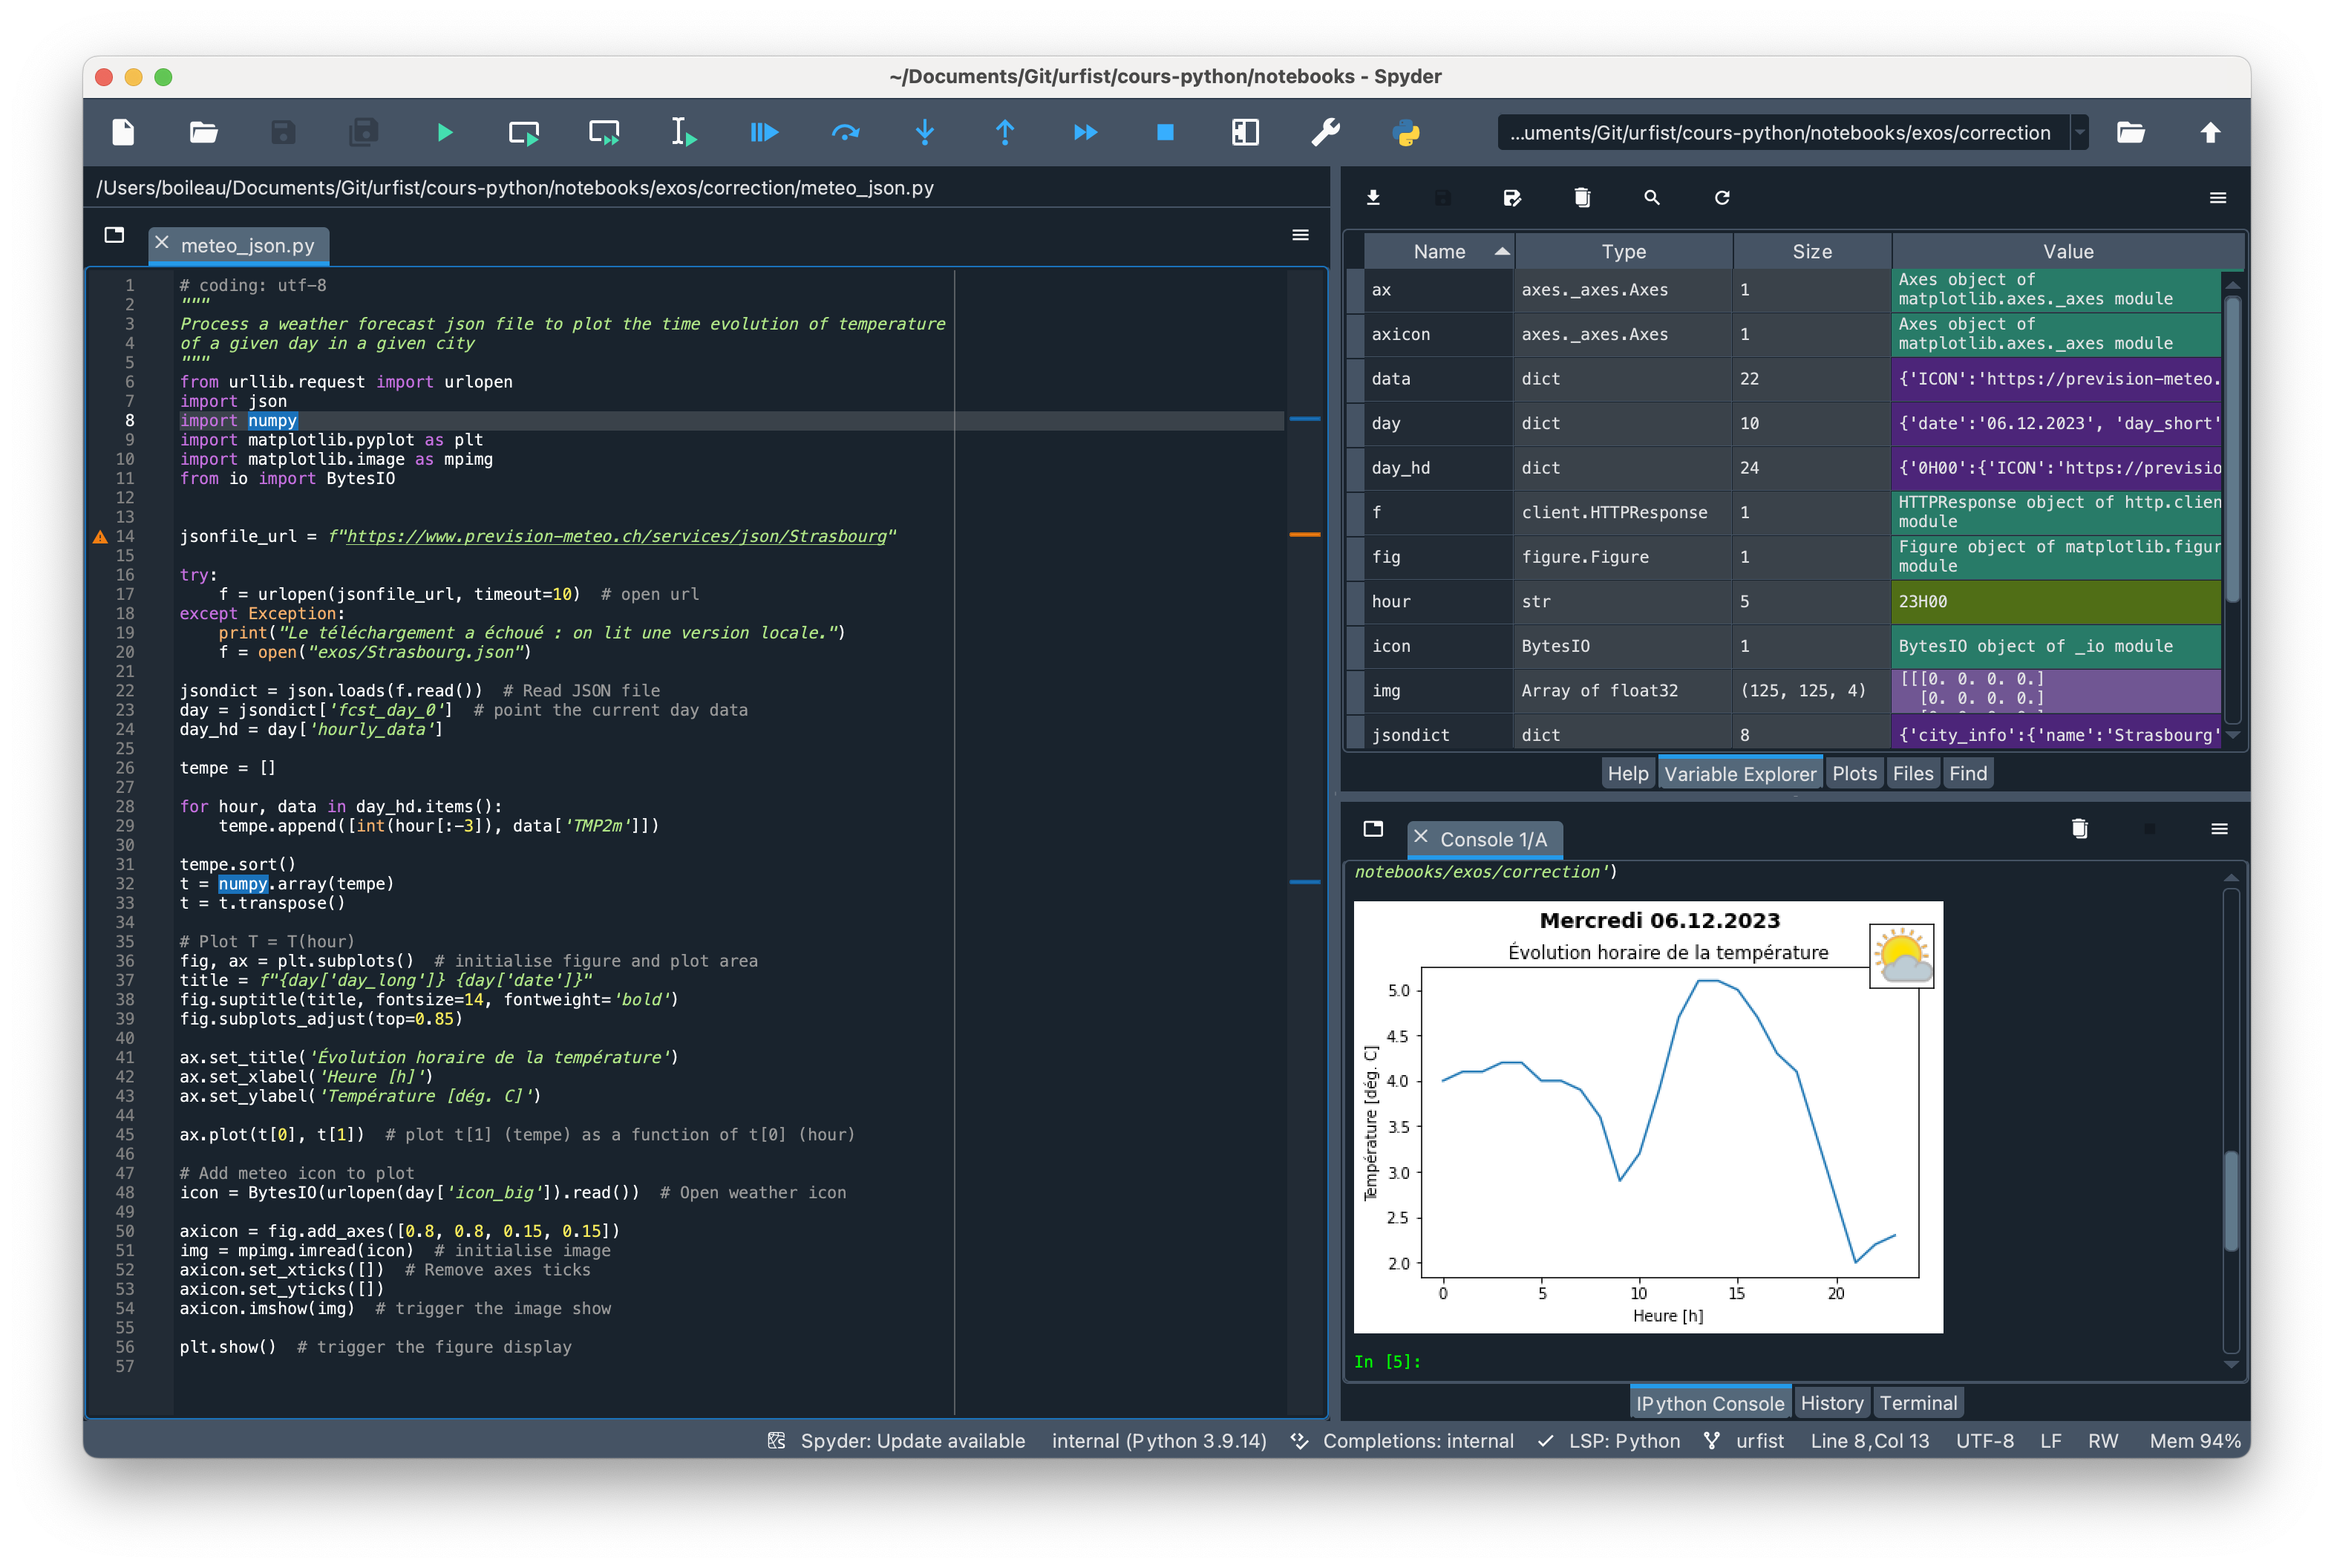

### Utilisez un gestionnaire de versions

L'outil incontournable depuis de nombreuses années pour gérer des versions est [Git](http://www.git-scm.com).

Git est conçu pour faciliter la création et la fusion des branches. Un conseil général est de faire des enregistrements *(commits)* fréquents et cohérents.

### Héberger vos dépôts de sources sur des forges logicielles

* [github](https://github.com) : ~100 millions d'utilisateurs, +400 millions de dépôts
* [gitlab](https://gitlab.com) : un concurrent moins visible mais aux fonctionnalités très intéressantes. Disponible notamment sous forme d'instances privées.


### Vérificateurs de code source

- [autopep8](https://pypi.org/project/autopep8/), [ruff](https://docs.astral.sh/ruff/) ou [black](https://pypi.org/project/black/) : pour normaliser la mise en page
- [pylint](http://www.pylint.org) ou [ruff](https://docs.astral.sh/ruff/) : pour vérifier que la syntaxe est correcte
- [mypy](https://mypy-lang.org/) : pour la vérification de type

Ces modules sont généralement disponibles dans les IDE avancées.


### Tests en Python

En programmation, on utilise des tests de non régression pour vérifier que les nouveaux développements et les corrections de bugs n'entraînent pas de pertes de fonctionalités et de nouveaux bugs.
On distingue généralement :
- les tests unitaires (comportement de fonctions prises séparément)
- les tests d'intégration (interaction entre plusieurs parties de programme)
- les tests du système complet

Python dispose de nombreux modules dédiés aux deux premières catégories. Quelques exemples :

* [`unittest`](https://docs.python.org/3/library/unittest.html) : fait partie de la bibliothèque standard
* [`doctest`](https://docs.python.org/3/library/doctest.html) : le test est basé sur des sorties de sessions interactives stockées généralement dans la *docstring* de la fonction testée (alourdit le code...)
* [`nose`](https://nose.readthedocs.io) : une extension de `unittest`
* [`pytest`](http://pytest.org) : syntaxe simple et nombreuses fonctionnalités

Une synthèse des outils existants sur [cette page](https://wiki.python.org/moin/PythonTestingToolsTaxonomy).

### Environnements virtuels

Les environnements virtuels sont très utiles pour le développement car ils permettent d'isoler les installations et les exécutions.

* [virtualenv](https://virtualenv.pypa.io)
* [conda environments](https://conda.io/docs/user-guide/tasks/manage-environments.html)

## Philosophie du langage : le zen de Python

![](fig/python-logo.png)

[PEP 20](https://www.python.org/dev/peps/pep-0020)

In [ ]:
import this

## Python 3.x vs 2.x

C'est le futur, et incidemment aussi le présent voire même le passé...

- Quoi : une version qui casse la compatibilité ascendante
- Pourquoi : nettoyage de parties bancales du langage accumulées au fil du temps
- Python 3.0 est sorti en 2008
- Python 2.7 est sorti en 2010 : EOL, fin de vie, (mal-)heureusement longue à venir
- Un certain nombre de choses n'a pas encore été converti pour fonctionner avec
- Les distributions linux majeures proposent encore la 2.X par défaut, mais la 3 est disponible en parallèle
- Une partie, la moins disruptive, a quand même été portée vers 2.6 et 2.7 pour aider à la transition
- Les tutoriels, et autres documentations disponibles sur internet ne sont pas forcément migrées
- Pour un nouveau projet, recherchez un peu avant de vous lancer, pour vérifier les besoins en librairies externes
- Les implémentations tierces d'interpréteurs python peuvent avoir des degrés variables de compatibilité avec les versions 3.x
- Les modules comportant des extentions en C sont plus compliqués à porter.

### Différences notables entre Python 2 et Python 3

- Division entière
- `print()`
- variable à durée de vie plus stricte (boucles, etc...)
- toutes les classes sont du nouveau type
- Les chaînes de caractères sont en UTF-8 par défaut & encoding(s) & byte() interface
- stdlib changée
- `range()` vs `xrange()`
- outils `2to3.py, 3to2, python-modernize, futurize`
- `pylint --py3k`
- module de compatibilité : `six` 

Plus d'informations sur le [wiki officiel](https://wiki.python.org/moin/Python2orPython3).

## Exercice de synthèse : décodage de l'ARN


### Enoncé 

On souhaite traduire une séquence d'ARN stockée dans le fichier [exos/arn.txt](exos/arn.txt) en une séquence d'acides aminés.
Pour ce faire, on dispose du code génétique (simplifié) stocké dans [exos/code_genetique.csv](exos/code_genetique.csv) (tableau tiré de [wikipedia](https://fr.wikipedia.org/wiki/Code_g%C3%A9n%C3%A9tique#Table_des_codons_d'ARN_messager)).

Le fichier `code_genetique.csv` contient pour chaque ligne :

```
Nom de l'acide aminé;lettre unique;nom abrégé;codon1,codon2,...
```

où `codon1` et `codon2` sont des codons synonymes : ils codent pour le même acide.

In [ ]:
%pycat exos/code_genetique.csv

### Consignes

1. Ecrire le code qui :

    - ouvre le fichier code génétique
    - lit son contenu avec le module [`csv`](https://docs.python.org/fr/3/library/csv.html) pour générer le dictionnaire suivant :

```python
code = {letter: {name: ...,
                 abrv: ...,
                 codons: [..., ..., ]}}
```

In [ ]:
# votre code ici


In [ ]:
# Décommentez la ligne suivante pour charger la solution
# %load exos/snippets/03_langage/arn_1.py


2. Construire le dictionnaire inverse `icode = {codon: letter}` qui traduit un codon en acide aminé représenté par sa lettre symbole.

In [ ]:
# votre code ici

In [ ]:
# Décommentez la ligne suivante pour charger la solution
# %load exos/snippets/03_langage/arn_2.py

3. Ecrire la fonction `decode()` qui admet comme argument la chaîne de caractères représentant une séquence d'ARN et retourne la séquence d'acides aminés (appelée peptide) correspondante sous forme de chaîne de caractères.
En fonction de l'argument optionnel `form`, cette fonction retournera :
    - soit une séquence de symboles (lettres)
    - soit des abréviations d'acides aminés (séparées par des `-`).

In [ ]:
# votre code ici

In [ ]:
# Décommentez la ligne suivante pour charger la solution
# %load exos/snippets/03_langage/arn_3.py

In [ ]:
s = ''
help(s.join)

4. Appliquer la fonction `decode()` à la chaîne de caractères représentant l'ARN contenue dans [exos/arn.txt](exos/arn.txt).

In [ ]:
# votre code ici

In [ ]:
# Décommentez la ligne suivante pour charger la solution
# %load exos/snippets/03_langage/arn_4.py

### Solution complète



In [ ]:
# Décommentez la ligne suivante pour charger la solution
# %load exos/snippets/03_langage/arn.py

## Exercices complémentaires

### Chaines de caractères

Ecrivez les fonctions suivantes, sans utiliser `upper()` ni `lower()` :

- `majuscule('azERtyUI')` $\rightarrow$ `'AZERTYUI'`
- `minuscule('azERtyUI')` $\rightarrow$ `'azertyui'`
- `inverse_casse('azERtyUI')` $\rightarrow$ `'AZerTYui'`
- `nom_propre('azERtyUI')` $\rightarrow$ `'Azertyui'`

> **Indice :** cet exercice s'apparente à de la "traduction"...

In [ ]:
def majuscule(chaine: str) -> str:
    # Votre code ici
    pass


def minuscule(chaine: str) -> str:
    # Votre code ici
    pass


def inverse_casse(chaine: str) -> str:
    # Votre code ici
    pass


def nom_propre(chaine: str) -> str:
    # Votre code ici
    pass


assert majuscule("azERtyUI") == "AZERTYUI"
assert minuscule("azERtyUI") == "azertyui"
assert inverse_casse("azERtyUI") == "AZerTYui"
assert nom_propre("azERtyUI") == "Azertyui"

In [ ]:
# Décommentez pour révéler la solution
# %load exos/snippets/03_langage/casse.py

### Récursion

Les fonctions dites récursives sont des fonctions qui font appel à elles-même, en résolvant une partie plus petite du problème à chaque appel, jusqu'à avoir un cas trivial à résoudre.

Par exemple, pour calculer *la somme de tous les nombres de 0 jusqu'à x*, on peut utiliser une fonction récursive.
Par exemple, pour $x = 10$, on a :

- $\sum_{n=0}^{10} n = 10 + \sum_{n=0}^{9} n$

- $\sum_{n=0}^{9} n = 9 + \sum_{n=0}^{8} n$

- etc.


In [ ]:
def sum_to(x: int) -> int:
    if x == 0:
        return 0
    return x + sum_to(x - 1)

In [ ]:
print(sum_to(9))

La fonction mathématique factorielle est similaire, mais calcule *le produit de tous les nombres de 1 jusqu'à x*.

In [ ]:
def fact(x: int) -> int:
    if x == 1:
        return 1
    return x * fact(x - 1)

In [ ]:
print(fact(5), fact(9))

La fonction mathématique qui calcule [la suite des nombres de Fibonacci](https://fr.wikipedia.org/wiki/Suite_de_Fibonacci), peut être décrite de la façon suivante :

- `fibo(0) = 0`
- `fibo(1) = 1`

Et pour toutes les autres valeurs :

- `fibo(x) = fibo(x - 1) + fibo(x - 2)`

> **Exercice** : écrivez une fonction récursive `fibo(x)` qui renvoie le x-ième nombre de la suite de Fibonnaci.

In [ ]:
def fibo(x: int) -> int:
    # Votre code ici
    pass

print(fibo(9))

In [ ]:
# Décommentez pour révéler la solution
# %load exos/snippets/03_langage/fibo.py

